In [0]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [0]:
# load dataset from file
df = pd.read_csv('week3_challenge.csv', index_col=[0])
df.head(3)

,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,DecisionFlag,...,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId,obiResult_scorecard,obiResult_score,obiResult_riskLevel,obiResult_ratingClass,obiResult_ncngav2Id
0,201812,Client did not meet approval score.,WRYRieZlqBsT6w53b2HDpA_1544015103274,334043596,302881418623,credit,True,1,NG,Declined,...,139.0,287.0,655.0,105872.674499,374ac87639a74b3e01465993be618360,NC_NGA_V2,337.57,Decline,NaN,a6e99ddb-2c95-4b1e-90cb-d05ffa9d1c9a
1,201809,Client did not meet approval score.,oVpQz7tgkPa3bmvVDzYqw_1530858694219,524284563,302328949395,credit,True,4,NG,Declined,...,327.0,1114.0,2923.0,34421.220891,e24749e856614a1ae3734c773670f74c,NaN,NaN,NaN,NaN,NaN
2,201810,Client did not meet approval score.,WCONqdL9BlaRetaDRERg_1538822524979,481582700,302536536368,credit,True,2,NG,Declined,...,139.0,583.0,1115.0,14447.944277,abe46a8fe9345c0b230c3fcaa5ddbbbc,NaN,NaN,NaN,NaN,NaN


In [0]:
# get features with missing values greater than 30%
percent_missing = df.isnull().mean() * 100
missing_features_greater_than_30percent = percent_missing[percent_missing > 30].index
print('Total count of columns with missing values greater than 30%:', len(missing_features_greater_than_30percent))

Total count of columns with missing values greater than 30%: 18


In [0]:
# delete features with missing values greater than 30%
df.drop(missing_features_greater_than_30percent, axis=1, inplace=True)

In [0]:
# select numeric features
num_df = df.select_dtypes(include=['int64', 'float64']).copy()
print('number of numeric columns: %s' % len(num_df.columns.values))
num_df.head()

number of numeric columns: 248


,createdAt_Month,SystemCustomerID,SystemLoanID,next_loan_number,Income,__v,demofeatures_net_income_band,demofeatures_appweek,demofeatures_age_at_application_yrs,demofeatures_num_children,...,callFeatures_vol_calls_1_mnth_out,callFeatures_vol_calls_2_mnth_out,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome
0,201812,334043596,302881418623,1,200000.0,0.0,200000.0,1.0,28.0,0.0,...,655.0,0.0,0.0,48872.0,0.985554,0.929771,139.0,287.0,655.0,105872.674499
1,201809,524284563,302328949395,4,80000.0,0.0,100000.0,1.0,33.0,0.0,...,2923.0,0.0,0.0,65335.0,0.956868,0.917550,327.0,1114.0,2923.0,34421.220891
2,201810,481582700,302536536368,2,39500.0,0.0,50000.0,2.0,26.0,0.0,...,1115.0,0.0,0.0,98762.0,0.000000,0.000000,139.0,583.0,1115.0,14447.944277
3,201812,234330495,302887567434,1,50000.0,0.0,50000.0,1.0,36.0,1.0,...,58.0,50.0,0.0,1530.0,0.762092,0.777778,46.0,38.0,108.0,52952.581832
4,201901,563455515,303057983993,2,20000.0,0.0,75000.0,3.0,28.0,3.0,...,1474.0,0.0,0.0,29949.0,0.937828,0.938942,114.0,549.0,1474.0,31577.275467


In [0]:
# Remove columns that may not contribute to our solution
num_df.drop(['createdAt_Month', 'SystemCustomerID', 'SystemLoanID'], axis=1, inplace=True)

In [0]:
# fill null values with 0
num_df.fillna(0, inplace=True)

In [0]:
# scale data
X = StandardScaler().fit_transform(num_df)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
# create pca
pca = PCA(n_components=5)

In [0]:
# fit the data to the model
principalComponents = pca.fit_transform(X)

In [0]:
# create dataframe containing principal components
columns = [
    'principal component 1', 
    'principal component 2', 
    'principal component 3', 
    'principal component 4', 
    'principal component 5'
]
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,4.221909,-2.273156,0.760895,-1.595942,4.229952
1,13.461862,-3.655075,-2.135355,-0.890576,-0.205635
2,5.898813,-2.348910,0.101535,0.483923,0.256511
3,-1.883405,1.373126,-0.209414,3.304034,0.290557
4,2.635306,1.729701,0.546624,-2.890968,-0.893202


In [0]:
pca.explained_variance_ratio_

array([0.3553984 , 0.0941872 , 0.03832466, 0.03382516, 0.02766937])

In [0]:
pca.explained_variance_ratio_.sum()

0.5494047793310485

In [0]:
# declare a Kmeans instance with 3 classes
model = KMeans(n_clusters=3)

In [0]:
# fit data 
model.fit(principalComponents)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
# get clusters
clusters = model.predict(principalComponents)

In [0]:
principalDf['cluster'] = clusters

In [0]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,cluster
0,4.221909,-2.273156,0.760895,-1.595942,4.229952,0
1,13.461862,-3.655075,-2.135355,-0.890576,-0.205635,1
2,5.898813,-2.348910,0.101535,0.483923,0.256511,0
3,-1.883405,1.373126,-0.209414,3.304034,0.290557,0
4,2.635306,1.729701,0.546624,-2.890968,-0.893202,0


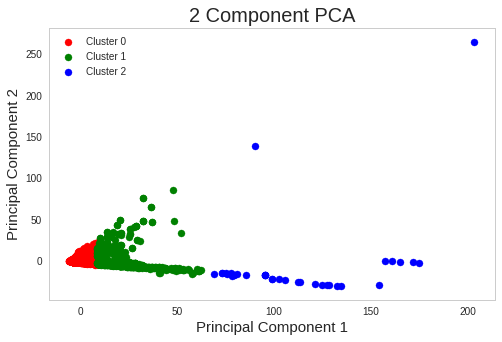

In [0]:
# plot based on cluster
with plt.style.context('seaborn-whitegrid'):

    fig = plt.figure(figsize = (8,5))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 Component PCA', fontsize = 20)

    cluster_list = [0, 1, 2]
    colors = ['r', 'g', 'b']

    for cluster, color in zip(cluster_list,colors):
        indicesToKeep = principalDf['cluster'] == cluster
        ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
                   , principalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    L = ax.legend(clusters)
    L.get_texts()[0].set_text('Cluster 0')
    L.get_texts()[1].set_text('Cluster 1')
    L.get_texts()[2].set_text('Cluster 2')

    ax.grid()

In [0]:
# Add cluster to original dataframe
df['cluster'] = clusters

In [0]:
df.head(2)

,createdAt_Month,Reason,application_id,SystemCustomerID,SystemLoanID,income_source,income_verified,next_loan_number,country,DecisionFlag,...,callFeatures_vol_calls_3_mnth_out,callFeatures_dur_calls_out,callFeatures_dur_calls_contacts_out,callFeatures_ratio_contacts_out,callFeatures_no_distinct_call_numbers_out,callFeatures_no_calls_over_zero_secs_out,callFeatures_no_calls_out,predictedIncome,installationId,cluster
0,201812,Client did not meet approval score.,WRYRieZlqBsT6w53b2HDpA_1544015103274,334043596,302881418623,credit,True,1,NG,Declined,...,0.0,48872.0,0.985554,0.929771,139.0,287.0,655.0,105872.674499,374ac87639a74b3e01465993be618360,0
1,201809,Client did not meet approval score.,oVpQz7tgkPa3bmvVDzYqw_1530858694219,524284563,302328949395,credit,True,4,NG,Declined,...,0.0,65335.0,0.956868,0.917550,327.0,1114.0,2923.0,34421.220891,e24749e856614a1ae3734c773670f74c,1


## Exploratory Data Analysis of Dataset Base on Cluster

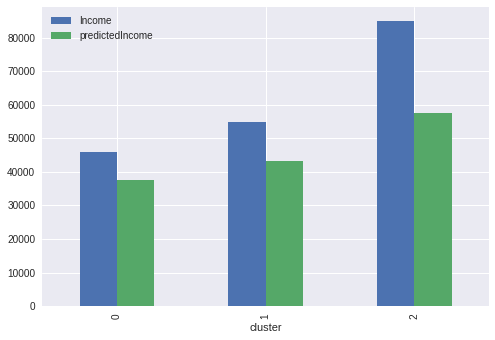

In [0]:
df.groupby('cluster')['Income', 'predictedIncome'].mean().round(2).plot(kind='bar')

We can see the mean income and predicted income for each cluster and notice that cluster 2 has the highest mean income and predicted income while cluster 1 has the lowest income and predicted income

In [0]:
df.groupby('cluster')['Income', 'predictedIncome'].describe()

Income                                                           \
           count          mean           std       min       25%      50%   
cluster                                                                     
0        11092.0  45873.975033  61368.461244     18.50  15000.00  25000.0   
1          865.0  54904.418173  63865.249085     74.17  20000.00  32000.0   
2           36.0  84844.563889  60759.025502  25000.00  61655.28  75000.0   

                            predictedIncome                                   \
              75%       max           count          mean           std  min   
cluster                                                                        
0         50000.0  801776.7         11090.0  37594.733000  23734.177304 -1.0   
1         70000.0  696986.0           865.0  43168.254559  28092.543687 -1.0   
2        100000.0  300000.0            36.0  57441.201649  38814.153072 -1.0   

                                                                  
                  25%           50%           75%            max  
cluster                                                           
0        22021.090482  31903.594741  45989.736533  277381.237491  
1        25781.220739  36638.129092  52132.772835  219053.850746  
2        30735.804095  47900.160932  66463.641163  181413.624264

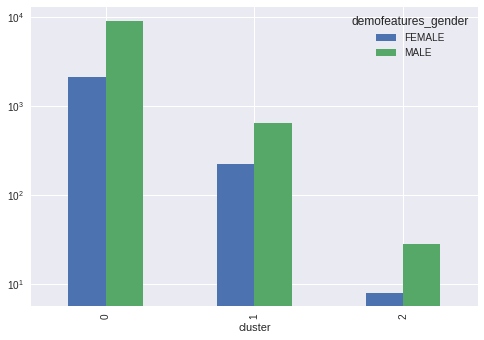

In [0]:
df.groupby(['cluster', 'demofeatures_gender'])['demofeatures_gender'].count().unstack().plot(kind='bar', logy=True)

Clearly we can see that more males applied for loan than female in all cluster with cluster 0 holding the highest number of male and female with rejected loan application.

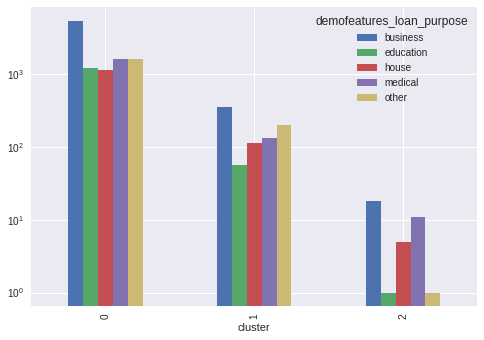

In [0]:
df.groupby(['cluster', 'demofeatures_loan_purpose'])['demofeatures_loan_purpose'].count().unstack().plot(kind='bar', logy=True)

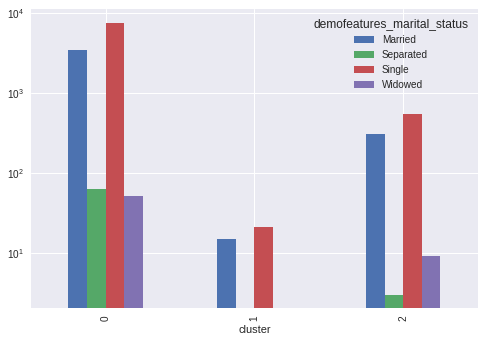

In [0]:
df.groupby(['cluster', 'demofeatures_marital_status'])['demofeatures_marital_status'].count().unstack().plot(kind='bar', logy=True)

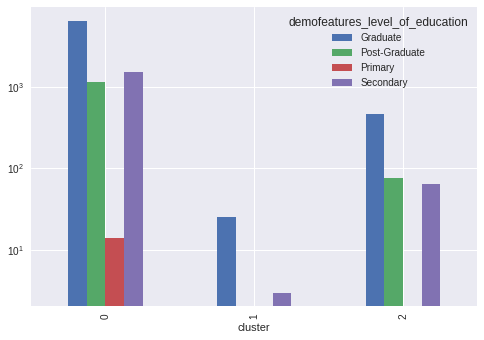

In [0]:
df.groupby(['cluster', 'demofeatures_level_of_education'])['demofeatures_level_of_education'].count().unstack().plot(kind='bar', logy=True)

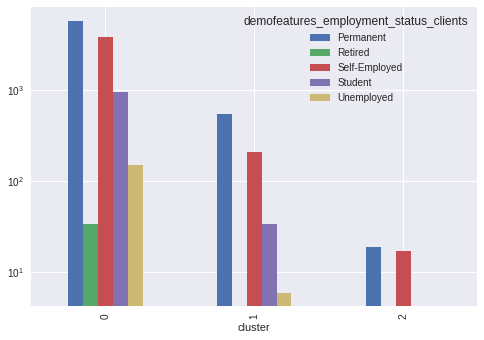

In [0]:
df.groupby(['cluster', 'demofeatures_employment_status_clients'])['demofeatures_employment_status_clients'].count().unstack().fillna(0).plot(kind='bar', logy=True)